Unit 1, Sprint 3, Module 3

###Learning Objectives:
- Student can model the relationship of multple predictor variables to a single outcome.
- Student can conduct a t-test to determine the significance of individual variables in the model.
- Student can compare model fit using R-squared

#Use the following information to answer the assignment questions.

###Is head size related to brain weight in healthy adult humans?

The Brainhead.csv dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

**We wish to determine if we can improve on our model of the linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

In [1]:
#Import the Brainhead.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


From the data dictionary:

Gender: 1 = male, 2 = female

Age: 1 = younger than age 46, 2 = age 46 and older

1) Run the OLS model relating head size to brain weight (you should have done this in your project yesterday) and print your results

In [5]:
### YOUR CODE HERE ###
from statsmodels.formula.api import ols

head_model = ols('Brain ~ Head', data=df).fit()

print(head_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           5.96e-54
Time:                        19:47:17   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.0

2) What is the adjusted $R^2$ for this model?  Explain what this value means in a complete sentence.



The adjusted $R^2$ for this model is 0.638, which means that 63.8% of the variability in the data is explained by the model.

3) Right now age and gender are coded with 1 and 2.  Just to be safe when we run our model, we want to subtract "1" from Age and Gender so that "1" is now coded as "0" and "2" is now coded as "1".  Create two new variables in the dataframe to do this - don't overwrite the original variables.

In [3]:
### YOUR CODE HERE ###
df['new_age'] = df['Age'] - 1
df['new_gender'] = df['Gender'] - 1

df.head()

,Gender,Age,Head,Brain,new_age,new_gender
0,1,1,4512,1530,0,0
1,1,1,3738,1297,0,0
2,1,1,4261,1335,0,0
3,1,1,3777,1282,0,0
4,1,1,4177,1590,0,0


4) Model the relationship of age group and head size to brain weight.

In [6]:
### YOUR CODE HERE ###
from statsmodels.formula.api import ols

head_model_age = ols('Brain ~ Head + Age', data=df).fit()

print(head_model_age.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     214.1
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           1.38e-53
Time:                        19:47:30   Log-Likelihood:                -1347.8
No. Observations:                 237   AIC:                             2702.
Df Residuals:                     234   BIC:                             2712.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    368.2821     50.618      7.276      0.0

5) At the alpha = 0.05 level, is age group statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

The p-value of 0.029 < 0.05, so we can conclude there is a statistically signicficant relationship between age and brain weight accounting for headsize.

6) At the alpha = 0.01 level, is age group statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

The p-value of 0.029 > 0.01, so we cannot conclude there is a statistically signicficant relationship between age and brain weight accounting for headsize.

7) What is the adjusted $R^2$ for the model relating head size and age group to brain weight?  Does adding age group to the model increase the amount of variability in brain weight explained by the model?

The adjusted $R^2$ for the model is 0.644, or 64.4%, so adding age to the model increases it's accuracy by about 0.6%.

8) Model the relationship of gender and head size to brain weight.

In [7]:
### YOUR CODE HERE ###
from statsmodels.formula.api import ols

head_model_gender = ols('Brain ~ Head + Gender', data=df).fit()

print(head_model_gender.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     211.0
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           4.15e-53
Time:                        19:47:44   Log-Likelihood:                -1348.9
No. Observations:                 237   AIC:                             2704.
Df Residuals:                     234   BIC:                             2714.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    396.5754     64.252      6.172      0.0

9) At the alpha = 0.05 level, is gender statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

The p-value of 0.107 > 0.05, so we cannot conclude there is a statistically signicficant relationship between age and brain weight accounting for headsize.

10) Write the linear model (insert the coefficients in the correct places) used to model the relationship between head size, age group and predicted brain weight.




$\hat{y}$ = 368.282 + 0.260 x Head - 20.732 x Age

11) Plot the relationship between head size and brain weight on a scatterplot. Use different color dots to represent older and younger individuals.

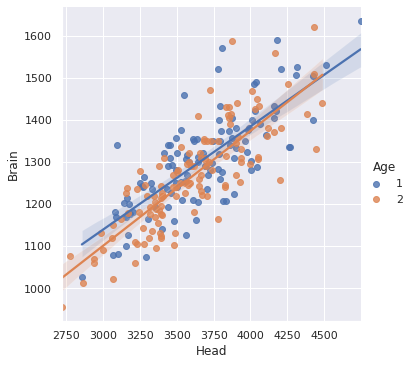

In [10]:
### YOUR CODE HERE ###
import seaborn as sns
sns.set_theme()
ax = sns.lmplot(x='Head', y='Brain', data=df, hue='Age')

12) Estimate the brain weight of a 60-year-old with a head size of 4000 cubic cm.

In [12]:
### YOUR CODE HERE ###
x1 = 4000
x2 = 1

intercept = head_model_age.params[0]
slope1 = head_model_age.params[1]
slope2 = head_model_age.params[2]


prediction = intercept + slope1*x1 + slope2*x2
print(prediction)

1389.3055663567452


1389.306g

13) Estimate the brain weight of a 20-year-old with a head size of 3900 cubic cm.

In [13]:
### YOUR CODE HERE ###
x3 = 3900
x4 = 0

prediction2 = intercept + slope1*x3 + slope2*x4
print(prediction2)

1383.9933343452553


1383.993g

#Portfolio Project Assignment

Get (and give) constructive feedback to a peer.  Swap projects with at least one other student, and give each other constructive feedback.  Make sure to tell them what you like about their project as well as any suggestions you have for imporvement.



---

